In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
scores = pd.read_csv('Data/Full Data/scores.csv')

C:\Users\david\AppData\Local\Temp\ipykernel_4364\2664025857.py:1: DtypeWarning: Columns (32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  scores = pd.read_csv('Data/Full Data/scores.csv')


In [3]:
scores = scores[scores['attempt'] == 1]

In [4]:
scores.shape

(1115812, 42)

In [5]:
scores.head()

,book,release,chapter,page,chapter_number,section_number,review_flag,institution_id,class_id,student_id,...,lrn_option_4,lrn_option_5,lrn_option_6,lrn_option_7,lrn_option_8,lrn_option_9,lrn_option_10,lrn_option_11,chapter_topic,page_topic
0,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,7535ba88-d131-4eee-b392-36f5e11c85ce,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Welcome to Statistics: A Modeling Approach,Doing Statistics with R
1,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,1d4a6d2c-0cb1-4d19-9218-b673982e9f2f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Welcome to Statistics: A Modeling Approach,Doing Statistics with R
2,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,94a09f74-2d8c-4379-92ad-7fe5b02ec188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Welcome to Statistics: A Modeling Approach,Doing Statistics with R
3,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,20a47775-9594-4800-9857-fd09633c561f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Welcome to Statistics: A Modeling Approach,Doing Statistics with R
4,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,7ea35ae6-4aee-4c17-b96a-e1ecb27f2b42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Welcome to Statistics: A Modeling Approach,Doing Statistics with R


In [6]:
scores['student_id'].nunique()

1563

In [7]:
scores.groupby('student_id')['book'].count().sort_values(ascending = False)

student_id
9455ad1a-55b6-44a1-82bc-7d21bc948f5c    1880
843dd9e2-98fd-4fce-9ac2-bcbe7ef7ee88    1849
1e6074a0-4b62-4bd6-8739-5e3edeb786a2    1849
43cbccae-8a82-401c-a38d-9f43bbc5a163    1849
7867fc31-3814-4d08-8d68-0336c3df8649    1849
                                        ... 
6d566358-f02f-436c-aba1-e0afd3b5bdd7       2
41f40590-73d2-4456-a82c-af900d8f9e49       1
e69ab722-c400-4135-b0d6-60b90cb39e12       1
d89259e6-5688-4097-9ac7-37043297f498       1
229f131c-fe22-40d9-a82b-1bd12898eaf3       1
Name: book, Length: 1563, dtype: int64

In [8]:
scores.groupby('student_id')['points_earned'].sum() / scores.groupby('student_id')['points_possible'].sum()

student_id
001824fb-a2fd-431d-aef6-7a1250d97a62    0.746432
0096491a-77bf-4e79-b906-fc7a8e5e57a6    0.632094
00a53a52-aa0e-4ddc-afa8-2c50c21dfd03    0.622478
00fe5bb2-6b64-4a36-a706-eac4dc124ea7    0.858511
016e2fcf-0cc2-42ad-844d-e1057b5081cc    0.825000
                                          ...   
fecf18d0-a58a-4d11-a353-ea73fbfa6860    0.397229
fef083e8-7167-4f42-82d5-d2e893aa408a    0.706070
ff548e42-0011-4dd7-ab46-2552503ad60c    0.805556
ff55bab4-812b-405b-9856-8bedf9fb11f9    0.786116
ff6ec9fe-de1d-4b45-8136-59465d9c85ab    0.567912
Length: 1563, dtype: float64

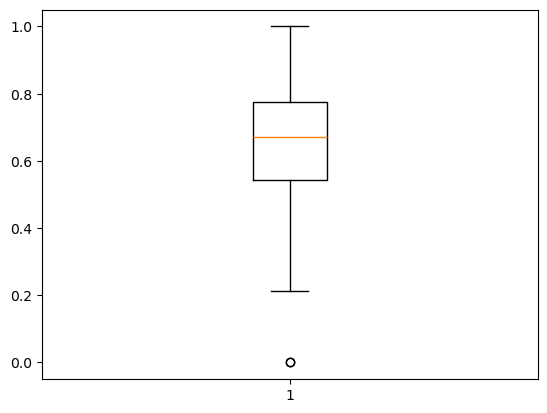

In [9]:
plt.boxplot(scores.groupby('student_id')['points_earned'].sum() / scores.groupby('student_id')['points_possible'].sum())
plt.show()

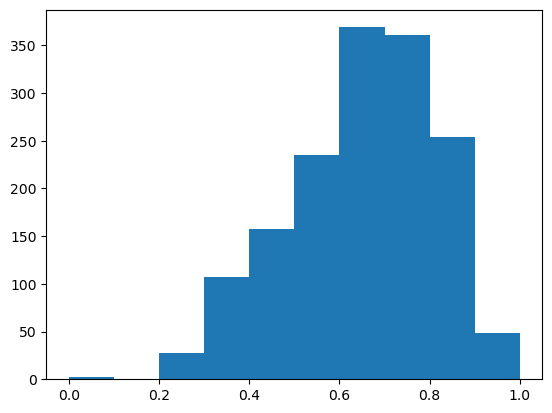

In [10]:
plt.hist(scores.groupby('student_id')['points_earned'].sum() / scores.groupby('student_id')['points_possible'].sum())
plt.show()

In [11]:
scores.shape

(1115812, 42)

In [12]:
scores[scores['student_id'] == '001824fb-a2fd-431d-aef6-7a1250d97a62'].shape

(911, 42)

In [13]:
scores.groupby('student_id')['page_topic'].nunique().sort_values(ascending = False)

student_id
ff6ec9fe-de1d-4b45-8136-59465d9c85ab    148
bfc98bf9-8728-4360-9197-5c82d49f3c4a    148
cd6e760d-a5e0-4465-aaa7-51357411939d    148
c9e2802f-0b56-47e3-bd01-024cf585a478    148
c8b42c6e-6b41-47ba-b1a2-1feefda6d153    148
                                       ... 
3d9df5b5-e1d7-40c5-ad24-ef6cf9e5bb62      1
6d566358-f02f-436c-aba1-e0afd3b5bdd7      1
229f131c-fe22-40d9-a82b-1bd12898eaf3      1
d6f2bf22-a116-4212-a657-8aa70e4ad866      1
7a26ed43-861a-41e6-8193-0bc925ab3c5a      1
Name: page_topic, Length: 1563, dtype: int64

In [14]:
topic_counts = scores.groupby('student_id')['page_topic'].nunique()

In [15]:
bad_students = topic_counts[topic_counts < 10].index

In [16]:
scores = scores[~scores['student_id'].isin(bad_students)]

In [17]:
scores.reset_index(drop = True, inplace = True)

In [18]:
scores.groupby('student_id')['page_topic'].nunique().sort_values(ascending = False)

student_id
ff6ec9fe-de1d-4b45-8136-59465d9c85ab    148
c2df6a43-9caf-4e41-9ed5-690e15bde140    148
cd6e760d-a5e0-4465-aaa7-51357411939d    148
eccad7b2-f533-4479-8342-c457275e39c8    148
7d8f4e24-9586-487b-9a94-c8f2f4f495f2    148
                                       ... 
6b27d0d1-16b5-4371-9310-54e53f2c1965     11
b63b584c-a69e-4e9d-ba57-efd9ecbeab77     11
7c7e05dd-5555-4838-97b0-47b2e87bcf3a     11
21b7aa18-5d8b-4c13-a18a-ecf1096290b4     11
9d086003-07ae-4340-9d36-84074446fa30     10
Name: page_topic, Length: 1479, dtype: int64

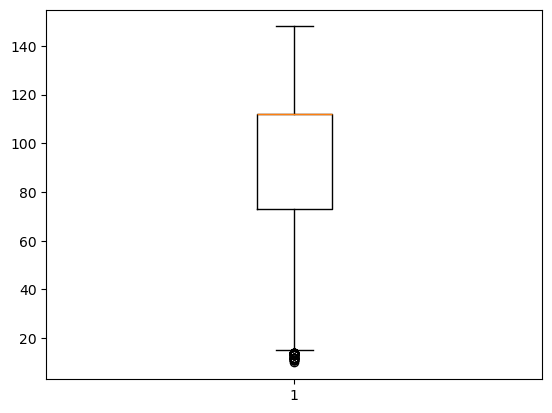

In [19]:
plt.boxplot(scores.groupby('student_id')['page_topic'].nunique())
plt.show()